In [1]:
%matplotlib inline
import waves
import matplotlib.pyplot as plt
import numpy as np

A/D conversion
=============

In [14]:
CD = waves.CDFormatSampler('CD')

SACD = waves.DSDSampler('SACD', 64 * 44100, 16)

# DVD possible combinations (16-, 20- or 24-bits per sample)
# Channels                          | 44.1 kHz | 48 kHz | 88.2 kHz | 96 kHz | 176.4 kHz | 192 kHz
# Mono (1.0)                        |    Yes   |  Yes   |    Yes   |  Yes   |    Yes    |   Yes   
# Stereo (2.0)                      |    Yes   |  Yes   |    Yes   |  Yes   |    Yes    |   Yes   
# Stereo (2.1)                      |    Yes   |  Yes   |    Yes   |  Yes   |    No     |   No   
# S+M surround (3.0 or 3.1)         |    Yes   |  Yes   |    Yes   |  Yes   |    No     |   No   
# Quad (4.0 or 4.1)                 |    Yes   |  Yes   |    Yes   |  Yes   |    No     |   No   
# 3-stereo (3.0 or 3.1)             |    Yes   |  Yes   |    Yes   |  Yes   |    No     |   No   
# 3-stereo+M surround (4.0 or 4.1)  |    Yes   |  Yes   |    Yes   |  Yes   |    No     |   No   
# Full surround (5.0 or 5.1)        |    Yes   |  Yes   |    Yes   |  Yes   |    No     |   No   
DVDA = waves.PCMSampler('DVD Audio', 88200, 20)

# High Fidelity Blu-ray Pure Audio uses 24 bits at 192 kHz (or also 96 kHz)
BDA = waves.HFPALinearPCM('Blu-Ray Audio')

# Generic, define sampling frequency (Hz) and resolution (bits) to your heart's content
GenericPCM_1 = waves.PCMSampler('Generic 1', 44100, 4) # Same CD frequency, lower resolution
GenericPCM_2 = waves.PCMSampler('Generic 2', 14000, 16) # Same CD resolution, lower frequency

CD stream: [32768 37420 41979 46351 50447 54186 57490 60293 62539 64181 65186 65535
 65219 64246 62635 60419 57642 54362 50643 46563 42203 37651 33001 28346
 23780 19397 15285 11527  8199  5369  3095  1422   384     2   284  1225
  2804  4991  7741 10998 14697 18761 23109 27653 32301 36958 41530 45924
 50052 53830 57181 60037 62340 64045 65115 65530 65281 64373 62824 60667
 57944 54711 51033 46985 42649 38112 33468 28809 24230 19825 15681 11884
  8510  5628  3296  1561   458    10   226  1101  2619  4747  7443 10652
 14309 18340 22664 27192 31834 36494 41079 45496 49654 53470 56867 59775
 62136 63902 65037 65518 65335 64493 63007 60909 58240 55055 51418 47404
 43093 38572 33934 29273 24682 20255 16081 12246  8827  5893  3503  1706
   539    25   175   985  2439  4507  7149 10309 13925 17923 22221 26733
 31367]
Generic 1 stream: [ 8  9 10 11 12 12 13 14 14 15 15 15 15 15 14 14 13 12 12 11 10  9  8  6
  5  4  3  3  2  1  1  0  0  0  0  0  1  1  2  3  3  4  5  6  7  8 10 11
 11 12 13 14 1

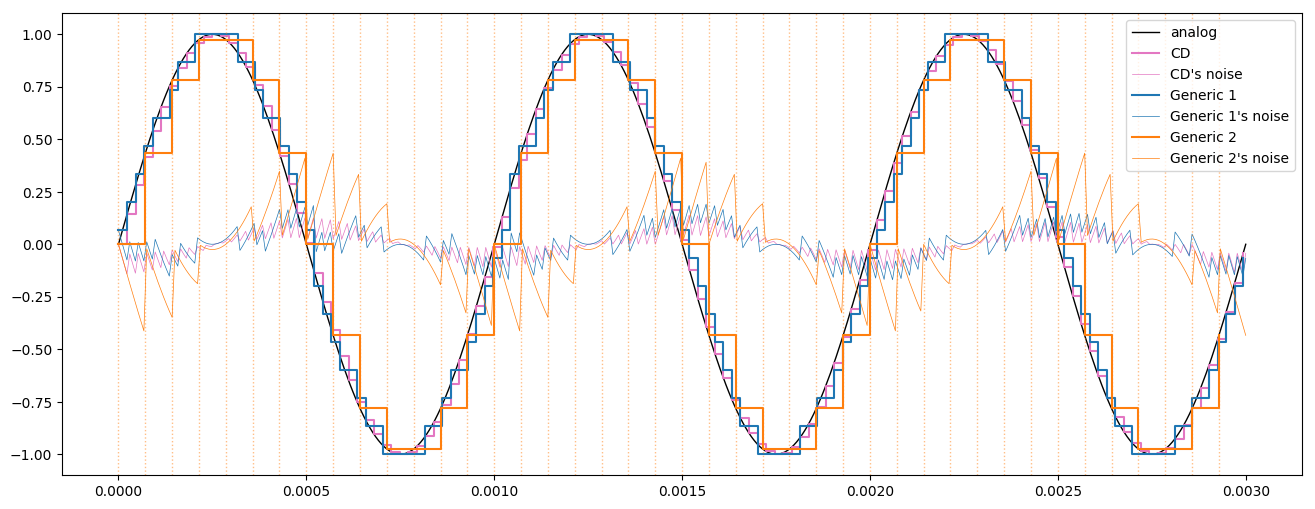

In [16]:
f = 1e3 # 1KHz
audio = waves.AnalogSineWave('analog', f, phase=0)
n_waves = 3
length = n_waves * 1/f

audio.plot(length, plt, color='k', lw=1)
CD.sample(audio, length, plt, lw=1.5)
##SACD.sample(audio, length, plt, color='b', lw=1.5)
#DVDA.sample(audio, length, plt, color='g', lw=1.5)
#BDA.sample(audio, length, plt, color='m', lw=1.5)
GenericPCM_1.sample(audio, length, plt, lw=1.5)
GenericPCM_2.sample(audio, length, plt, lw=1.5)
[plt.axvline(t, color=GenericPCM_2.color, lw=1, ls=':', alpha=0.5) for t in np.arange(0, length, GenericPCM_2.sampling_interval)]
#[plt.axhline(A, color='b', lw=1, ls=':', alpha=0.5) for A in np.linspace(audio.Amin, audio.Amax, GenericPCM.levels)]
plt.legend()
plt.gcf().set_size_inches(16, 6)